In [1]:
# this is for exercise 2


In [1]:
x = 3


In [2]:
x * 5

15

In [1]:
nine = 9

In [2]:
number = nine + 2

In [3]:
print(number)

11


When making the map, keep the following points in mind:

Good choice of colors
Visual hierarchy
Use of suitable projection
Use of map elements which are necessary for the map
Map layout

## PART 1

In [5]:
# One local static map of the selected PPGIS data (mention the source)

In [1]:
import geopandas as gpd
import pathlib

# Notebook path
NOTEBOOK_PATH = pathlib.Path().resolve()

# We will export the final map here,
# let’s also prepare an output directory for it:
DATA_DIRECTORY = NOTEBOOK_PATH / 'data'
# MAP_DIRECTORY = NOTEBOOK_PATH / "MyMap"
# MAP_DIRECTORY.mkdir(exist_ok=True)

# read the data as a geodataframe
everyday_errands = gpd.read_file(DATA_DIRECTORY / 'everyday_errand_points.shp')
happy_points = gpd.read_file(DATA_DIRECTORY / 'happy_points.shp')
home_points = gpd.read_file(DATA_DIRECTORY / 'home_points_an_v1.shp')







ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


   uid                           type             Frequency Travel_mod  \
0   91  Outdoor and sports facilities  several times a week    Walking   

                         geometry  
0  POINT (374035.148 6673488.240)  
Number of rows in our dataset: 5005


<Axes: >

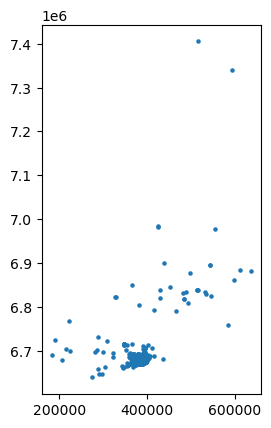

In [2]:
# explore data
print(everyday_errands.head(1))

print (f"Number of rows in our dataset: {len(everyday_errands)}")
everyday_errands.plot(markersize=5)

   uid                        geometry
0   91  POINT (373980.451 6673124.713)
1   95  POINT (394775.821 6692237.666)
2   99  POINT (391765.272 6685214.579)
Number of rows in our dataset: 3194


<Axes: >

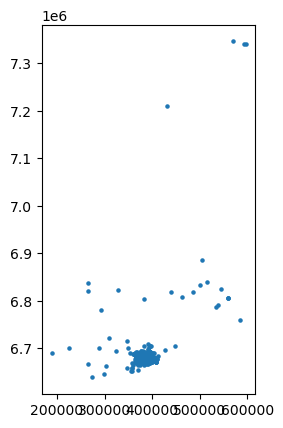

In [3]:
# explore data
print(happy_points.head(3))

print (f"Number of rows in our dataset: {len(happy_points)}")
happy_points.plot(markersize=5)

      uid  age                        geometry
813  1630    2  POINT (394790.640 6691980.492)
814  1530    2  POINT (395891.606 6692158.187)
815   775    2  POINT (396283.060 6692259.736)
816   696    2  POINT (395076.936 6693352.727)
817   704    3  POINT (394976.001 6693034.261)
818  1301    3  POINT (381830.992 6694849.899)
819  1563    3  POINT (394915.062 6705648.314)
820  1739    0  POINT (385727.529 6672549.207)
821   932    0  POINT (383487.362 6677586.778)
822  1494    0  POINT (396972.036 6677222.395)
823   616    0  POINT (383410.361 6678309.497)
Number of rows in our dataset: 824


<Axes: >

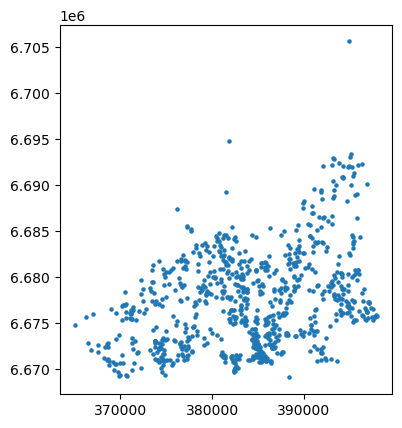

In [4]:
# explore data
print(home_points.tail(11))

print (f"Number of rows in our dataset: {len(home_points)}")
home_points.plot(markersize=5)

In [5]:
# get rid of points outside Helsinki 

# Import the needed library
import osmnx

PLACE_NAME = "Helsinki, Finland"
hel_area = osmnx.geocode_to_gdf(PLACE_NAME)

# Get the polygon to the same CRS as original data (this is important as we are going to perform a spatial join)
hel_area = hel_area.to_crs(everyday_errands.crs)
assert everyday_errands.crs == hel_area.crs, "CRS do not match"

In [6]:
# Do the spatial join and extract the points which are within the polygon
points_in_helsinki = gpd.sjoin(everyday_errands, hel_area, how="inner", predicate='within')

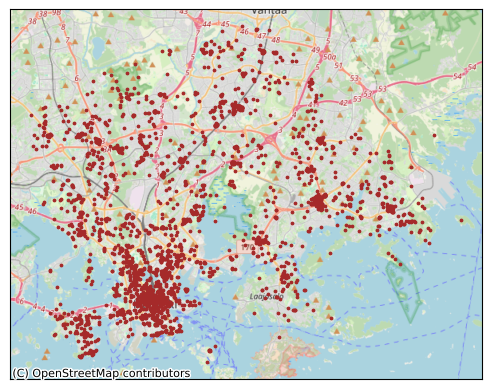

In [7]:
import contextily
points_to_err = points_in_helsinki.to_crs("EPSG:3857")

ax= points_to_err.plot(markersize=3, color='brown')

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

In [8]:
points_in_helsinki.Frequency.unique()

array(['Everyday', 'several times a week', 'Once a week', 'Hardly ever',
       'Several times a month', None], dtype=object)

In [9]:
points_in_helsinki.head()

,uid,type_left,Frequency,Travel_mod,geometry,index_right,bbox_north,bbox_south,bbox_east,bbox_west,...,osm_id,lat,lon,class,type_right,place_rank,importance,addresstype,name,display_name
33,101,Outdoor and sports facilities,Everyday,Walking,POINT (384334.990 6673449.964),0,60.29785,59.922486,25.254512,24.782803,...,34914,60.167488,24.942747,boundary,administrative,15,0.785427,city,Helsinki,"Helsinki, Helsinki sub-region, Uusimaa, Mainla..."
34,101,Outdoor and sports facilities,several times a week,Walking,POINT (384794.389 6674082.008),0,60.29785,59.922486,25.254512,24.782803,...,34914,60.167488,24.942747,boundary,administrative,15,0.785427,city,Helsinki,"Helsinki, Helsinki sub-region, Uusimaa, Mainla..."
35,101,Outdoor and sports facilities,Once a week,None,POINT (384689.270 6673257.420),0,60.29785,59.922486,25.254512,24.782803,...,34914,60.167488,24.942747,boundary,administrative,15,0.785427,city,Helsinki,"Helsinki, Helsinki sub-region, Uusimaa, Mainla..."
36,101,"Offices, bureaus, businesses",Hardly ever,Walking,POINT (384407.214 6674173.399),0,60.29785,59.922486,25.254512,24.782803,...,34914,60.167488,24.942747,boundary,administrative,15,0.785427,city,Helsinki,"Helsinki, Helsinki sub-region, Uusimaa, Mainla..."
37,101,Shopping,Once a week,Walking,POINT (384730.014 6673732.479),0,60.29785,59.922486,25.254512,24.782803,...,34914,60.167488,24.942747,boundary,administrative,15,0.785427,city,Helsinki,"Helsinki, Helsinki sub-region, Uusimaa, Mainla..."


In [10]:
points_in_helsinki.Travel_mod.unique()

array(['Walking', None, 'Public transport', 'Car', 'Bike', 'Other'],
      dtype=object)

In [11]:
points_in_helsinki.type_left.unique()

array(['Outdoor and sports facilities', 'Offices, bureaus, businesses',
       'Shopping', 'Leisure and recreational places'], dtype=object)

In [12]:
# marker could express what type of acticity
# colour could express the frequency of visits, with a colourmap?

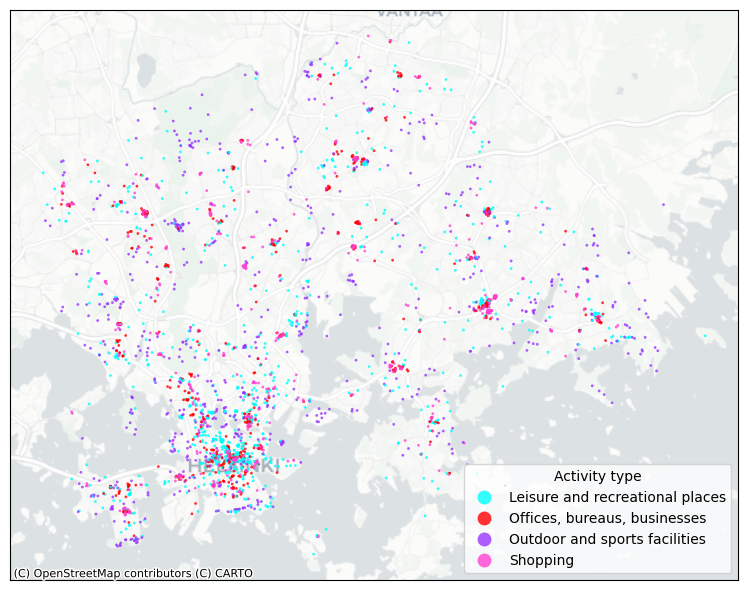

In [13]:
# Transform to Web Mercator
points_to_err = points_in_helsinki.to_crs("EPSG:3857")

# Plotting with colors based on the 'Quality' column. 
# Go with a built in color map
#cmap='plasma'

# Or make your own
import matplotlib.colors as mcolors
binary_cmap = mcolors.ListedColormap(["#00fffa","#ff0002", "#9a35ff", "#ff42d3"])

ax = points_to_err.plot(markersize=4, column='type_left', cmap=binary_cmap, legend=True, 
                        alpha = 0.8, edgecolor='none', legend_kwds={"title": "Activity type","loc" : "lower right"})

# Adding a basemap
contextily.add_basemap(ax, source=contextily.providers.CartoDB.Positron, alpha=0.8)

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# set this to off if you want to remove the frame
ax.axis('on')
# Adjust figure size to accommodate the legend, if necessary
fig = ax.figure
fig.set_size_inches(8, 6)
fig.tight_layout()

In [14]:
# local area

PLACE_NAME = "Oulunkylä, Helsinki, Finland"
ogeli_area = osmnx.geocode_to_gdf(PLACE_NAME)

# Get the polygon to the same CRS as original data (this is important as we are going to perform a spatial join)
ogeli_area = ogeli_area.to_crs(everyday_errands.crs)
assert everyday_errands.crs == ogeli_area.crs, "CRS do not match"

<Axes: >

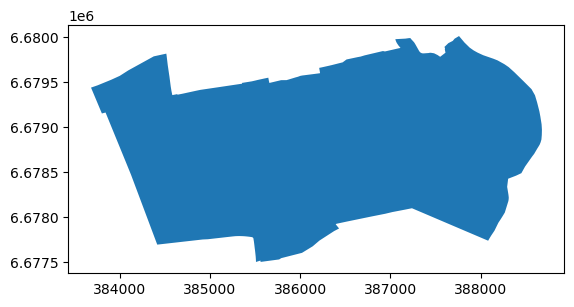

In [15]:
ogeli_area.plot()

In [16]:
# Do the spatial join and extract the points which are within the polygon
points_in_ogeli = gpd.sjoin(everyday_errands, ogeli_area, how="inner", predicate='within')

In [17]:
# creating the 'house' point
from shapely.geometry import Point

house = Point(24.9360, 60.2341)

house = gpd.GeoDataFrame(geometry=[Point(24.9360, 60.2341)], crs="EPSG:4326")

/opt/conda/lib/python3.11/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/opt/conda/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/opt/conda/lib/python3.11/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/opt/conda/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/opt/con

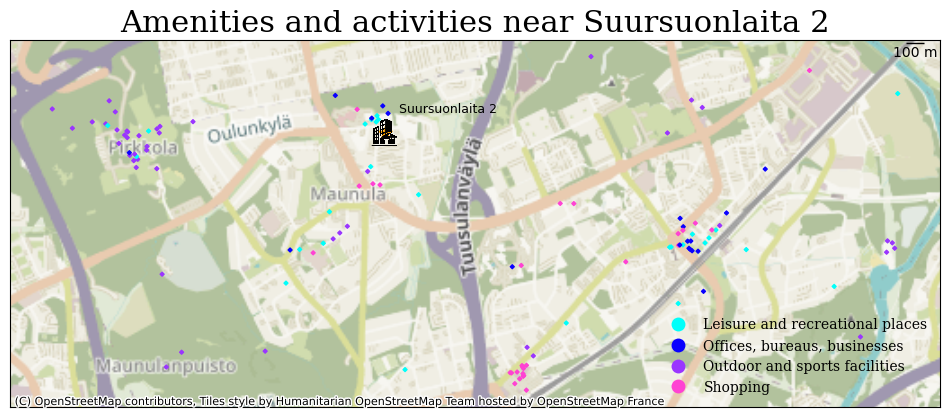

In [57]:
points_to_err_ogeli = points_in_ogeli.to_crs("EPSG:3857")
house = house.to_crs("EPSG:3857")

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import matplotlib.font_manager as fm

# own colours
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
my_cmap = mcolors.ListedColormap(["#00fffa","#0900FF", "#9a35ff", "#ff42d3"])

# Create font properties
custom_font = fm.FontProperties(family='serif', weight='normal', size=10)

ax = points_to_err_ogeli.plot(markersize=4, marker="D", column="type_left", cmap=my_cmap, legend=True, figsize=(12, 12),
                             legend_kwds={"loc": "lower right", "frameon" : False,"fancybox" : False, 'prop': custom_font})


house.plot(ax=ax, marker='*', color='orange', markersize=100, label='Address')


def add_image_at_location(ax, filepath, coord, zoom):
    img = plt.imread(filepath)
    
    imagebox = OffsetImage(img, zoom=zoom)
    
    ab = AnnotationBbox(imagebox, coord, frameon=False, bboxprops=dict(edgecolor='none'))
    
    ax.add_artist(ab)

add_image_at_location(ax, "data/property.png", (house.geometry.x, house.geometry.y), zoom=0.04)
ax.text(house.geometry.x +1200, house.geometry.y + 180, "Suursuonlaita 2", fontsize=9, ha='right', va='bottom')
        

# Set title
plt.title('Amenities and activities near Suursuonlaita 2', fontdict={'fontsize': '22', 'family': 'serif', 'fontweight': '30'})


from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# Helsinki's latitude
latitude = 60
# Calculate the scale correction factor for the Mercator distortion
scale_correction = 1 / np.cos(np.radians(latitude))
# Adjust the scale bar length accordingly
adjusted_length = 100 * scale_correction
# length without adjustment
length=100

# Add a scale bar with AnchoredSizeBar
fontprops = fm.FontProperties(size=10)
scalebar = AnchoredSizeBar(ax.transData,
                           adjusted_length,  # Length of the bar in data units
                           '100 m',  # Label for the scale bar
                           'upper right',  # Location of the scale bar
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.HOT)


# Save the figure
#ax.savefig(NOTEBOOK_PATH / 'house_map.png', bbox_inches='tight')
plt.savefig("house_map.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# add title, maybe scalebar, north arrow, move legend
# custom marker for something?
# add data source info?
# what colours for points, points size

# I need a more elaborate basemap, because I haven't got any other information than the points

 ## Part 2 

Use the global powerplants data and make a global map. Use the appropriate visualization method for your map to explore interesting aspects of the data. Alternatively, you may use the airport dataset from the tutorial, but your map must be significantly different, 
focusing on new aspects of the data or using a distinct cartographic approach. 
If you come across other interesting global data, you can use it but remember to mention the source.